Calculate TOA radiative imbalance and surface temperature trends from slab ocean simulations

Calculate radiative feedbacks as in
$\lambda = (N - F)/T$

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import nctoolkit as nct

import xarray
import proplot as pplt

nctoolkit is using Climate Data Operators version 1.9.9


In [2]:
my_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2'

f_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/fixed_SSTs'
e_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/SOM'
b_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/'
cesm2_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/fixed_SSTs'

In [3]:
# FCM simulations; pop SST fields to create mask
b_dir_CESM1 = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2/FCM'

pop_pi = xarray.open_dataset('%s/CLIMO/b.e12.B1850C5CN.f09_g16.preind.pop.h.TEMP.50yrclimo_192x288.nc' %(b_dir_CESM1))
pop_plio = xarray.open_dataset('%s/CLIMO/b.e12.B1850.f09_g16.PIMP4-pliomip2.modMed.pop.h.TEMP.50yrclimo_192x288.nc' %(b_dir_CESM1))

In [4]:
# mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/domain.lnd.fv0.9_1.25_gx1v6plioenh.190801.nc')
# mask['ni'] = mask.mask.xc[0,:]
# mask['nj'] = mask.mask.yc[:,0]

# mask = mask.rename(ni='lon',nj='lat')

mask = xarray.open_dataset('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2/SOM/Pliocene_mask.nc')

In [5]:
# make a mask for the Pliocene to prevent big anomalies in SST and ICEFRAC fields

plio_mask = pop_plio.TEMP.mean('time')[0,:,:].isnull().to_masked_array()
pi_mask = pop_pi.TEMP.mean('time')[0,:,:].isnull().to_masked_array()

In [6]:
cesm2_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/fixed_SSTs'

In [7]:
# get forcing from fixed SST simulations

f_pi = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.284.7.cam.h0.allvars.06-33yrs.nc' %(f_dir))
f_plio = xarray.open_dataset('%s/f.e21.F1850.f09_f09.PMIP4-midPliocene.new.400.0.cam.h0.allvars.06-30yrs.nc' %(f_dir))
f_CO2 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.569.4.cam.h0.allvars.06-33yrs.nc' %(f_dir))

f_plio_280 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.PMIP4-midPliocene.new.284.7.cam.h0.allvars.06-35yrs.nc' %(f_dir))
f_400 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.400.cam.h0.TEMP.ICE.FORCING.SHOW.06-33yrs.nc' %(cesm2_dir))

f_weights = np.cos(np.deg2rad(f_CO2.lat))

In [25]:
# upload SOM simulations

e_pi = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_plio = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.TEMP.ICE.FORCING.76-126yrs.nc' %(e_dir))
e_co2 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_400 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_plio_280 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.TEMP.ICE.FORCING.25-75yrs.nc' %(e_dir))

SOM_weights = np.cos(np.deg2rad(e_pi.lat))

In [18]:
# upload SOM simulations

e_pi_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.TS.allyears_yearly.nc' %(e_dir))
e_plio_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.TS.allyears_yearly.nc' %(e_dir))
e_co2_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.TS.allyears_yearly.nc' %(e_dir))
e_400_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.TS.allyears_yearly.nc' %(e_dir))
e_plio_280_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.TS.allyears_yearly.nc' %(e_dir))

SOM_weights = np.cos(np.deg2rad(e_pi.lat))

In [20]:
def time_weights(ds):
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xarray.ALL_DIMS), 1.0)
    
    return wgts

In [21]:
def lat_weights(ds):
    clat = np.cos(np.deg2rad(ds.lat)) 
    return clat / np.sum(clat) 

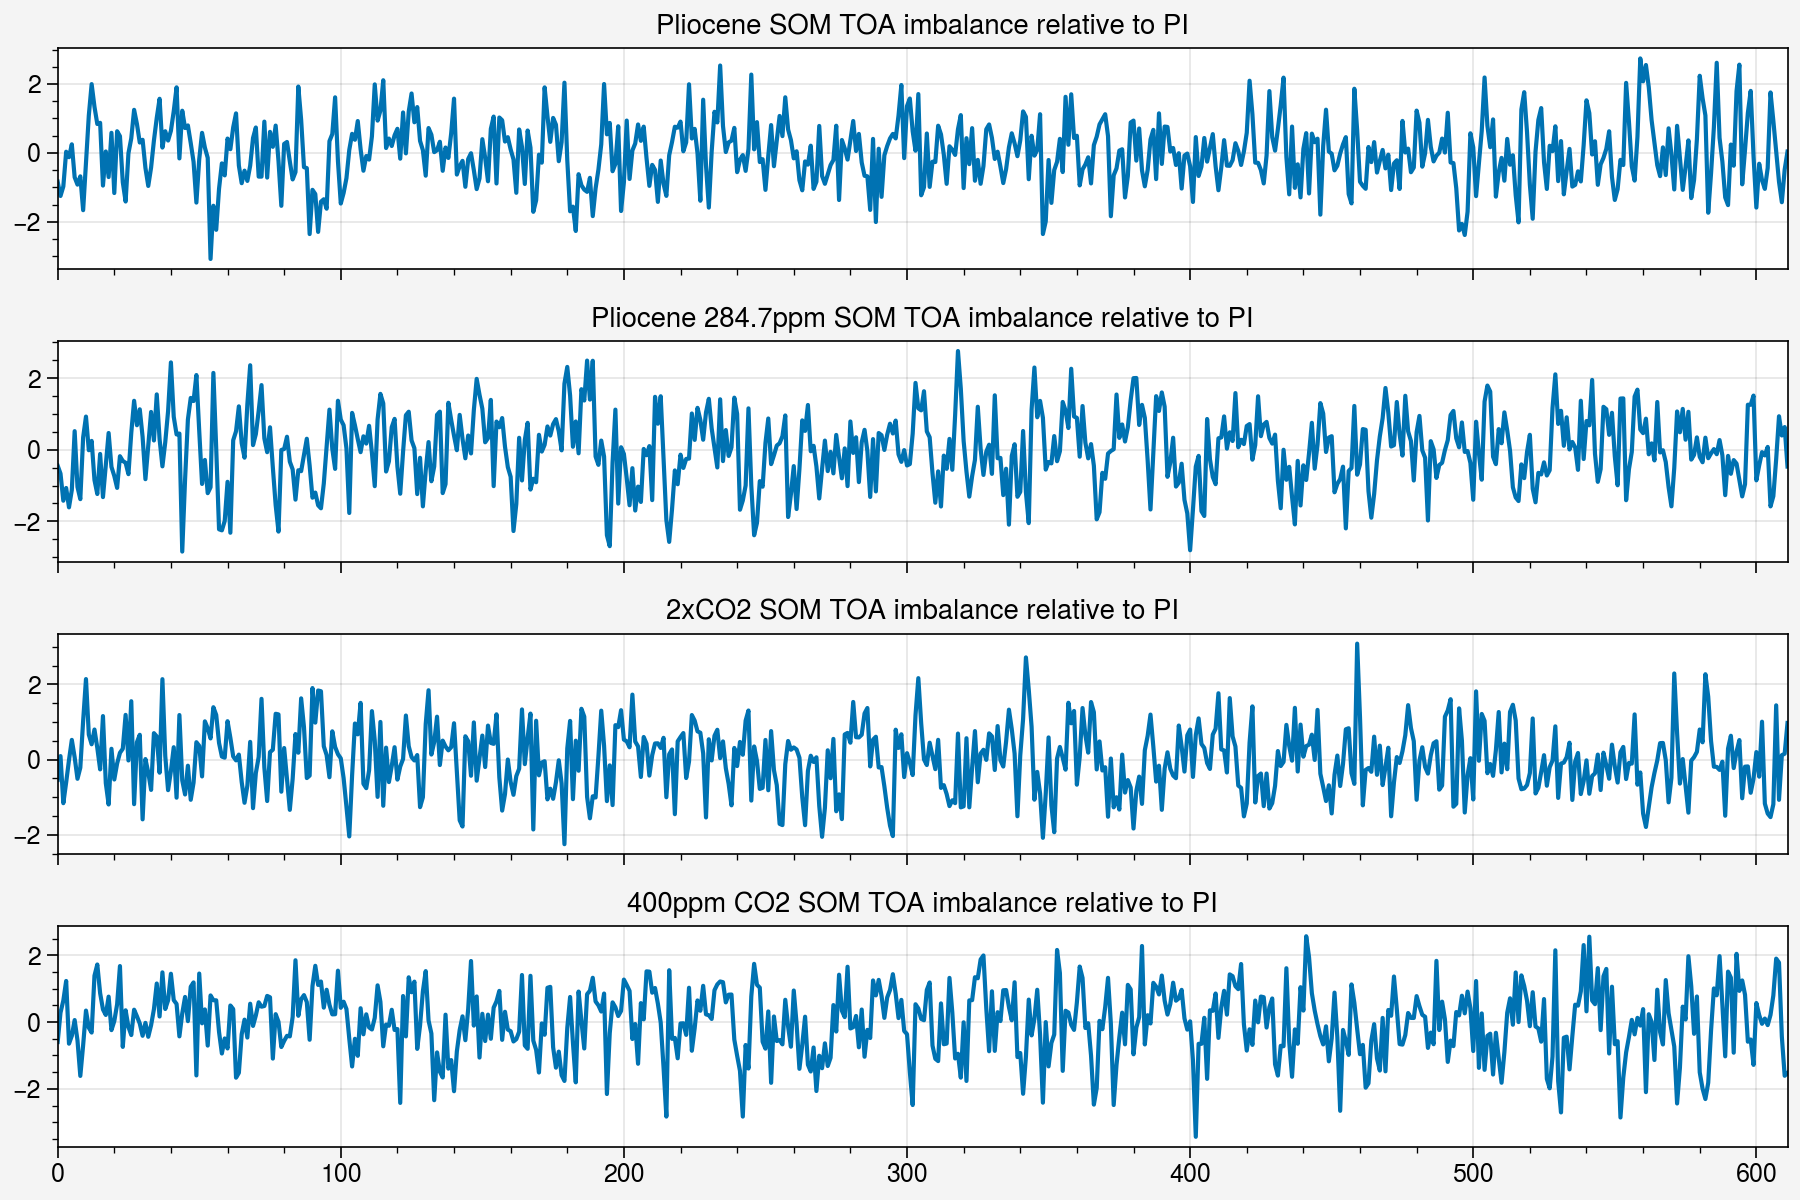

In [22]:
# Plot TOA imbalance 
fig, ax = pplt.subplots(ncols=1,nrows=4, figsize=(9,6))
N_plio = ((e_plio.FSNT - e_pi.FSNT.mean('time')) - (e_plio.FLNT - e_pi.FLNT.mean('time'))).weighted(SOM-weights).mean(("lat","lon"))
N_plio_pi = ((e_plio_280.FSNT - e_pi.FSNT.mean('time')) - (e_plio_280.FLNT - e_pi.FLNT.mean('time'))).weighted(SOM-weights).mean(("lat","lon"))
N_co2 = ((e_co2.FSNT - e_pi.FSNT.mean('time')) - (e_co2.FLNT - e_pi.FLNT.mean('time'))).weighted(SOM-weights).mean(("lat","lon"))
N_400 = ((e_400.FSNT - e_pi.FSNT.mean('time')) - (e_400.FLNT - e_pi.FLNT.mean('time'))).weighted(SOM-weights).mean(("lat","lon"))

N_plio = N_plio.groupby('time.month') - N_plio.groupby('time.month').mean('time')
N_plio_pi = N_plio_pi.groupby('time.month') - N_plio_pi.groupby('time.month').mean('time')
N_co2 = N_co2.groupby('time.month') - N_co2.groupby('time.month').mean('time')
N_400 = N_400.groupby('time.month') - N_400.groupby('time.month').mean('time')

ax[0].plot(np.asarray(N_plio))
ax[0].set_title('Pliocene SOM TOA imbalance relative to PI')
ax[1].plot(np.asarray(N_plio_pi))
ax[1].set_title('Pliocene 284.7ppm SOM TOA imbalance relative to PI')
ax[2].plot(np.asarray(N_co2))
ax[2].set_title('2xCO2 SOM TOA imbalance relative to PI')
ax[3].plot(np.asarray(N_400))
ax[3].set_title('400ppm CO2 SOM TOA imbalance relative to PI');

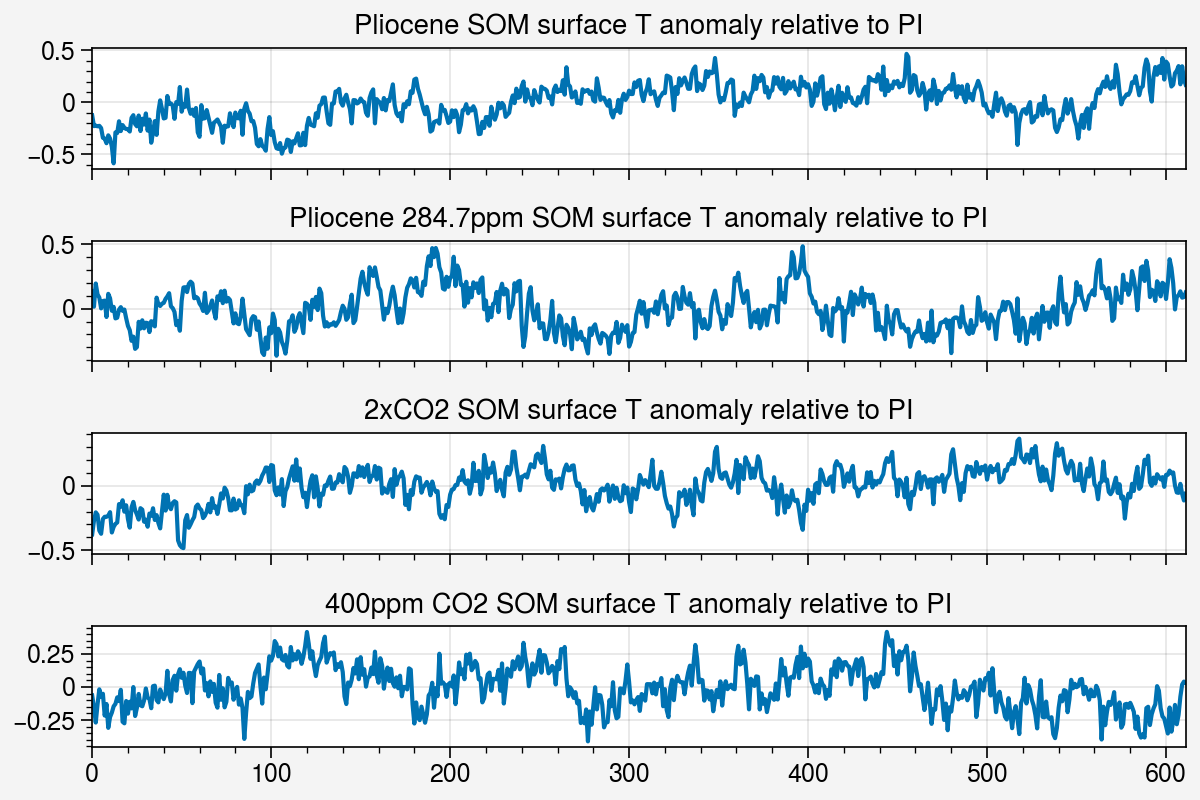

In [49]:
# Plot TOA imbalance 
fig, ax = pplt.subplots(ncols=1,nrows=4, figsize=(6,4))
T_plio = ((e_plio.TS - e_pi.TS.mean('time'))).weighted(SOM_weights).mean(("lat","lon"))
T_plio_pi = (e_plio_280.TS - e_pi.TS.mean('time')).weighted(SOM_weights).mean(("lat","lon"))
T_co2 = ((e_co2.TS - e_pi.TS.mean('time'))).weighted(SOM_weights).mean(("lat","lon"))
T_400 = ((e_400.TS - e_pi.TS.mean('time'))).weighted(SOM_weights).mean(("lat","lon"))

T_plio = T_plio.groupby('time.month') - T_plio.groupby('time.month').mean('time')
T_plio_pi = T_plio_pi.groupby('time.month') - T_plio_pi.groupby('time.month').mean('time')
T_co2 = T_co2.groupby('time.month') - T_co2.groupby('time.month').mean('time')
T_400 = T_400.groupby('time.month') - T_400.groupby('time.month').mean('time')

ax[0].plot(np.asarray(T_plio))
ax[0].set_title('Pliocene SOM surface T anomaly relative to PI')
ax[1].plot(np.asarray(T_plio_pi))
ax[1].set_title('Pliocene 284.7ppm SOM surface T anomaly relative to PI')
ax[2].plot(np.asarray(T_co2))
ax[2].set_title('2xCO2 SOM surface T anomaly relative to PI')
ax[3].plot(np.asarray(T_400))
ax[3].set_title('400ppm CO2 SOM surface T anomaly relative to PI');

In [52]:
# calculate temperature trends over period of analysis
#T_plio = ((e_plio.TS - e_pi.TS.mean('time'))).weighted(SOM_weights).mean(("lat","lon"))
trend_plio = T_plio.polyfit(dim='time', deg=0)
trend_plio_pi = T_plio_pi.polyfit(dim='time', deg=0)
trend_400 = T_400.polyfit(dim='time', deg=0)

In [53]:
print(trend_plio, trend_plio_pi, trend_400)

<xarray.Dataset>
Dimensions:               (degree: 1)
Coordinates:
  * degree                (degree) int64 0
Data variables:
    polyfit_coefficients  (degree) float64 1.543e-16 <xarray.Dataset>
Dimensions:               (degree: 1)
Coordinates:
  * degree                (degree) int64 0
Data variables:
    polyfit_coefficients  (degree) float64 -6.283e-17 <xarray.Dataset>
Dimensions:               (degree: 1)
Coordinates:
  * degree                (degree) int64 0
Data variables:
    polyfit_coefficients  (degree) float64 -3.085e-17


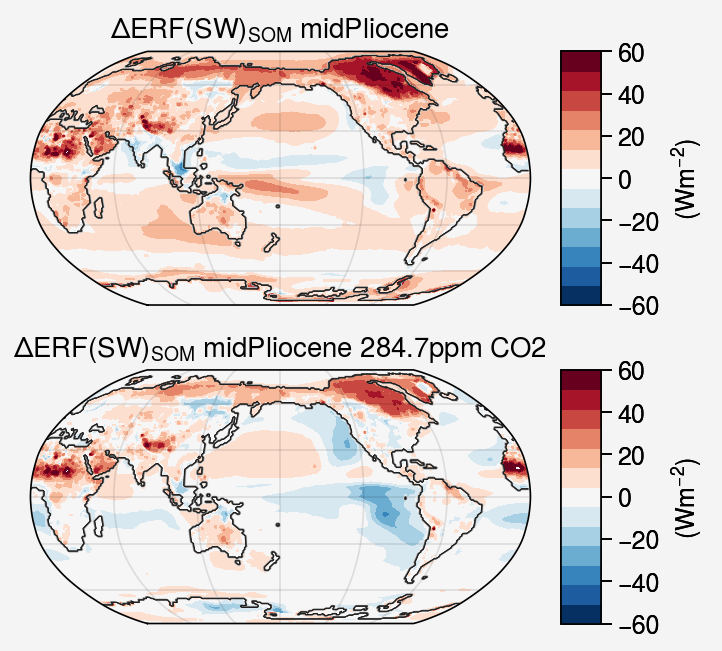

In [17]:
plt.rcParams["font.size"] = 9

model_diff = (e_plio.FSNT.mean("time") - e_pi.FSNT.mean("time")) 

fig, ax = pplt.subplots(nrows=2, ncols=1, proj='robin', proj_kw={'lon_0': 180})
cf = ax[0].contour(mask.mask, cmap='black', linewidth=0.3)
cp = ax[0].contourf(model_diff, cmap='RdBu_r', levels=np.linspace(-60,60,14))
ax[0].colorbar(cp,label='(W$m^{-2}$)', ticks=20, length=1.0)
#ax.coastlines()
ax[0].set_title('\u0394ERF(SW)$_{SOM}$ midPliocene')

model_diff = (e_plio_280.FSNT.mean("time") - e_pi.FSNT.mean("time")) - (e_plio_280.FLNT.mean("time") - e_pi.FLNT.mean("time"))

cf = ax[1].contour(mask.mask, cmap='black', linewidth=0.3)
cp = ax[1].contourf(model_diff, cmap='RdBu_r', levels=np.linspace(-60,60,14))
ax[1].colorbar(cp,label='(W$m^{-2}$)', ticks=20, length=1.0)
#ax.coastlines()
ax[1].set_title('\u0394ERF(SW)$_{SOM}$ midPliocene 284.7ppm CO2');

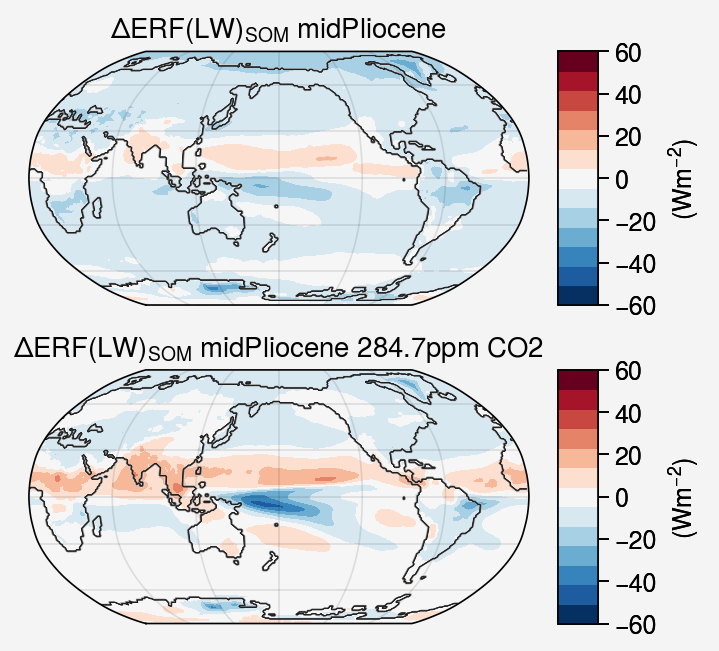

In [46]:
plt.rcParams["font.size"] = 9

model_diff = - (e_plio.FLNT.mean("time") - e_pi.FLNT.mean("time"))

fig, ax = pplt.subplots(nrows=2, ncols=1, proj='robin', proj_kw={'lon_0': 180})
cf = ax[0].contour(mask.mask, cmap='black', linewidth=0.3)
cp = ax[0].contourf(model_diff, cmap='RdBu_r', levels=np.linspace(-60,60,14))
ax[0].colorbar(cp,label='(W$m^{-2}$)', ticks=20, length=1.0)
#ax.coastlines()
ax[0].set_title('\u0394ERF(LW)$_{SOM}$ midPliocene')

model_diff = - (e_plio_280.FLNT.mean("time") - e_pi.FLNT.mean("time"))

cf = ax[1].contour(mask.mask, cmap='black', linewidth=0.3)
cp = ax[1].contourf(model_diff, cmap='RdBu_r', levels=np.linspace(-60,60,14))
ax[1].colorbar(cp,label='(W$m^{-2}$)', ticks=20, length=1.0)
#ax.coastlines()
ax[1].set_title('\u0394ERF(LW)$_{SOM}$ midPliocene 284.7ppm CO2');

In [11]:
def calculate_clearsky_SW(e_ds, e_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_SW = ((e_ds.FSNTC.weighted(time_weights(e_ds)).mean('time') - e_ds_pi.FSNTC.weighted(time_weights(e_ds_pi)).mean('time')) - 
                    ((f_ds.FSNTC.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FSNTC.weighted(time_weights(f_ds_pi)).mean('time'))
                   + 1.01 * delta_T))
    

    return N_minus_F_SW

def calculate_clearsky_LW(e_ds, e_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_LW = (-(e_ds.FLNTC.weighted(time_weights(e_ds)).mean('time') - e_ds_pi.FLNTC.weighted(time_weights(e_ds_pi)).mean('time')) - 
                    ((-(f_ds.FLNTC.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FLNTC.weighted(time_weights(f_ds_pi)).mean('time')))
                   + 1.01 * delta_T))
    
    return N_minus_F_LW

def calculate_allsky_SW(e_ds, e_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_SW = ((e_ds.FSNT.weighted(time_weights(e_ds)).mean('time') - e_ds_pi.FSNT.weighted(time_weights(e_ds_pi)).mean('time')) - 
                    ((f_ds.FSNT.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FSNT.weighted(time_weights(f_ds_pi)).mean('time'))
                   + 1.01 * delta_T))
    

    return N_minus_F_SW

def calculate_allsky_LW(e_ds, e_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_LW = (-(e_ds.FLNT.weighted(time_weights(e_ds)).mean('time') - e_ds_pi.FLNT.weighted(time_weights(e_ds_pi)).mean('time')) - 
                    ((-(f_ds.FLNT.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FLNT.weighted(time_weights(f_ds_pi)).mean('time')))
                    + 1.01 * delta_T))
    
    return N_minus_F_LW

In [12]:
def calc_temp(sim, pi):
    return (sim.TS).weighted(time_weights(sim)).mean('time').weighted(lat_weights(f_weights)).mean(("lat","lon")) - pi.TS.weighted(time_weights(pi)).mean('time').weighted(lat_weights(f_weights)).mean(("lat","lon"))

In [13]:
e_temp = [e_plio, e_plio_280, e_co2]
f_temp = [f_plio, f_plio_280, f_400]

TS = [calc_temp(sim, e_pi) for sim in e_temp]
T_surf = [calc_temp(sim, f_pi) for sim in f_temp]

In [14]:
sims = [e_plio, e_plio_280, e_400]
forcings = [f_plio, f_plio_280, f_400]

N_minus_F_SW_CS = [calculate_clearsky_SW(sim, e_pi, F, f_pi, T) for sim, F, T in zip(sims, forcings, T_surf)]
N_minus_F_LW_CS = [calculate_clearsky_LW(sim, e_pi, F, f_pi, T) for sim, F, T in zip(sims, forcings, T_surf)]
    
N_minus_F_SW = [calculate_allsky_SW(sim, e_pi, F, f_pi, T) for sim, F, T in zip(sims, forcings, T_surf)]
N_minus_F_LW = [calculate_allsky_LW(sim, e_pi, F, f_pi, T) for sim, F, T in zip(sims, forcings, T_surf)]

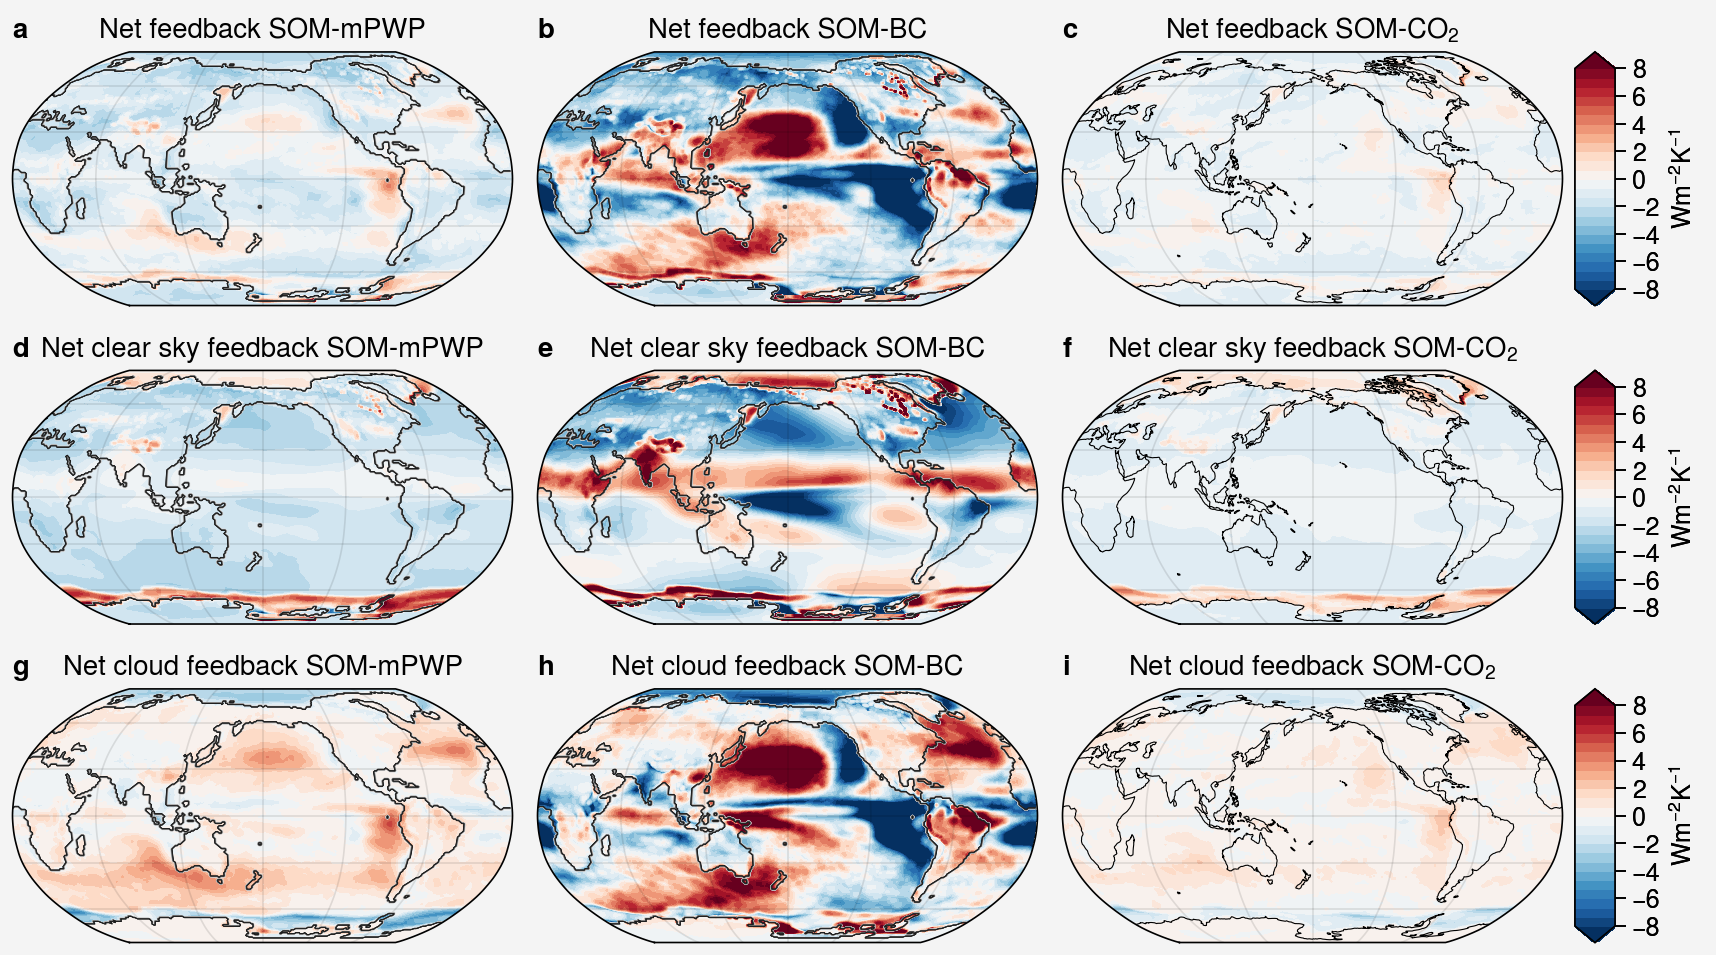

In [15]:
fig, axes = pplt.subplots(ncols=3,nrows=3, proj='robin', proj_kw={'lon_0': 180})

for i,ax in enumerate(axes[:3]):

    cp = ax.contourf((N_minus_F_LW[i] + N_minus_F_SW[i])/TS[i], levels=np.linspace(-8,8,25), extend='both')

    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)
        
axes[2].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[0].set_title('Net feedback SOM-mPWP')
axes[1].set_title('Net feedback SOM-BC')
axes[2].set_title('Net feedback SOM-CO$_2$')

axes[2].coastlines(linewidth=0.4)

for i,ax in enumerate(axes[3:6]):

    cp = ax.contourf((N_minus_F_LW_CS[i] + N_minus_F_SW_CS[i])/TS[i], levels=np.linspace(-8,8,25), extend='both')

    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)

axes[5].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[3].set_title('Net clear sky feedback SOM-mPWP')
axes[4].set_title('Net clear sky feedback SOM-BC')
axes[5].set_title('Net clear sky feedback SOM-CO$_2$')

axes[5].coastlines(linewidth=0.4)

for i,ax in enumerate(axes[6:]):
    
    cp = ax.contourf(((N_minus_F_LW[i] - N_minus_F_LW_CS[i]) + 
                     (N_minus_F_SW[i] - N_minus_F_SW_CS[i]))/TS[i], levels=np.linspace(-8,8,25), extend='both')

    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)

axes[8].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[6].set_title('Net cloud feedback SOM-mPWP')
axes[7].set_title('Net cloud feedback SOM-BC')
axes[8].set_title('Net cloud feedback SOM-CO$_2$')

axes[8].coastlines(linewidth=0.4)

fig.format(abc=True)
plt.savefig('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/figures/Feedback_SOM_figure_revised.pdf');